<h1 align="center">Volume 1: Facial Recognition.</h1>


In [211]:
import os
import numpy as np
from imageio import imread
from matplotlib import pyplot as plt
import scipy.linalg as la

### Helper Functions

In [212]:
def get_faces(path="./faces94"):
    """Traverse the specified directory to obtain one image per subdirectory. 
    Flatten and convert each image to grayscale.
    
    Parameters:
        path (str): The directory containing the dataset of images.  
    
    Returns:
        ((mn,k) ndarray) An array containing one column vector per
            subdirectory. k is the number of people, and each original
            image is mxn.
    """
    # Traverse the directory and get one image per subdirectory.
    faces = []
    for (dirpath, dirnames, filenames) in os.walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg":       # Only get jpg images.
                # Load the image, convert it to grayscale,
                # and flatten it into a vector.
                faces.append(np.ravel(imread(dirpath+"/"+fname, as_gray=True)))
                break
    # Put all the face vectors column-wise into a matrix.
    return np.transpose(faces)


def sample_faces(k, path="./faces94"):
    """Generate k sample images from the given path.

    Parameters:
        n (int): The number of sample images to obtain. 
        path(str): The directory containing the dataset of images.  
    
    Yields:
        ((mn,) ndarray): An flattend mn-array representing a single
        image. k images are yielded in total.
    """
    files = []
    for (dirpath, dirnames, filenames) in os.walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg":       # Only get jpg images.
                files.append(dirpath+"/"+fname)

    # Get a subset of the image names and yield the images one at a time.
    test_files = np.random.choice(files, k, replace=False)
    for fname in test_files:
        yield np.ravel(imread(fname, as_gray=True))

### Problem 1 

- Implement `show()`.
- Use `show()` to display a face from the `faces94` dataset.

In [213]:
def show(image, m=200, n=180):
    """Plot the flattened grayscale 'image' of width 'w' and height 'h'.
    
    Parameters:
        image ((mn,) ndarray): A flattened image.
        m (int): The original number of rows in the image.
        n (int): The original number of columns in the image.
    """
    map = None #for if it is gray or not
    image_original = np.reshape(image,(m,n))
    if len(image_original.shape) != 3:
        map = 'gray'
    plt.imshow(image_original,cmap=map) #show the image
    plt.axis('off')

    

In [214]:
F = get_faces()


C:\Users\wilso\AppData\Local\Temp\ipykernel_15940\1106870313.py:20: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  faces.append(np.ravel(imread(dirpath+"/"+fname, as_gray=True)))


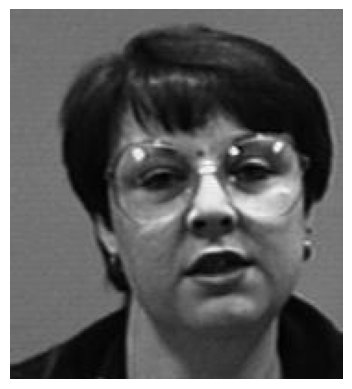

In [215]:
show(F[:,0])

In [216]:
class FacialRec(object):
    """Class for storing a database of face images, with methods for
    matching other faces to the database.
    
    Attributes:
        F ((mn,k) ndarray): The flatten images of the dataset, where
            k is the number of people, and each original image is mxn.
        mu ((mn,) ndarray): The mean of all flatten images.
        Fbar ((mn,k) ndarray): The images shifted by the mean.
        U ((mn,k) ndarray): The U in the compact SVD of Fbar;
            the columns are the eigenfaces.
    """
    # Problems 2-3
    def __init__(self, path='./faces94'):
        """Initialize the F, mu, Fbar, and U attributes.
        This is the main part of the computation.
        """
        #get faces from file
        F = get_faces(path)
        self.F = F
        #Find the mean face
        self.mean_face = sum(F.T)/(F.T.shape[0])
        F_bar = (F.T - self.mean_face).T # get F bar
        self.F_bar = F_bar

        self.U,v,d = la.svd(F_bar,False)



    # Problem 3
    def project(self, A, s):
        """Project a face vector onto the subspace spanned by the first s
        eigenfaces, and represent that projection in terms of those eigenfaces.
        
        Parameters:
            A((mn,) or (mn,l) ndarray): The array to be projected. 
            s(int): the number of eigenfaces.
        Returns: 
            ((s,) ndarray): An array of the projected image of s eigenfaces.
        """
        #compute the projection
        return self.U[:,:s].T @ A



    # Problem 5
    def find_nearest(self, g, s=38):
        """Find the index j such that the jth column of F is the face that is
        closest to the face image 'g'.
        
        Parameters:
            g ((mn,) ndarray): A flattened face image.
            s (int): the number of eigenfaces to use in the projection.

        Returns:
            (int): the index of the column of F that is the best match to
                   the input face image 'g'.
        """
        #get the hats
        F_hat = self.project(self.F,s)
        g_hat = self.project(g,s)
        J = []
        for i in range(len(self.F.T)): #loop through each picture
            J.append(la.norm(F_hat.T[i] - g_hat))
        # j = np.argmin(la.norm(F_hat.T - g_hat))
        return np.argmin(J)

    # Problem 6
    def match(self, image, s=38, m=200, n=180):
        """Display an image along with its closest match from the dataset. 
        
        Parameters:
            image ((mn,) ndarray): A flattened face image.
            s (int): The number of eigenfaces to use in the projection.
            m (int): The original number of rows in the image.
            n (int): The original number of columns in the image.
        """
        plt.subplot(1,2,1)
        plt.title('Sample')
        show(image) # show the original image

        plt.subplot(1,2,2)
        plt.title('Nearest Match')
        show(face.F.T[face.find_nearest(image)]) # find the nearest match

### Problem 2

- In `FacialRec.__init__()`, compute $F$, the mean face $\boldsymbol{\mu}$, and the mean-shifted faces $\bar{F}$.
Store each as an attribute.

- Initialize a `FacialRec` object and display its mean face, plus an original image and its shifted face.

In [217]:
face = FacialRec()


C:\Users\wilso\AppData\Local\Temp\ipykernel_15940\1106870313.py:20: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  faces.append(np.ravel(imread(dirpath+"/"+fname, as_gray=True)))


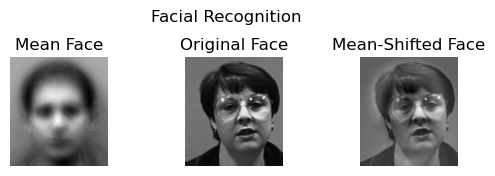

In [218]:
# plot the mean face
plt.subplot(331)
plt.imshow(np.reshape(face.mean_face,(200,180)),cmap='gray')
plt.axis('off')
plt.title('Mean Face')

# plot the original face
plt.subplot(332)
plt.imshow(np.reshape(face.F.T[0],(200,180)),cmap='gray')
plt.axis('off')
plt.title('Original Face')

# plot the mean-shifted face
plt.subplot(333)
plt.imshow(np.reshape(face.F_bar.T[0],(200,180)),cmap='gray')
plt.axis('off')
plt.title('Mean-Shifted Face')

plt.suptitle('Facial Recognition')
plt.show()

### Problem 3

- In `FacialRec.__init__()`, compute the compact SVD of $\bar{F}$ and store the $U$ as an attribute.
- Use `show()` to display some of the eigenfaces (the columns of $U$).
- Implement `FacialRec.project()` (in a single line).


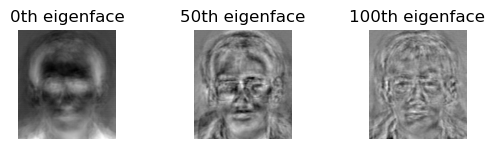

In [219]:
for i,k in enumerate([0,50,100]):
    plt.subplot(3,3,i+1) 
    plt.title('{}th eigenface'.format(k))
    show(face.U[:,k]) # show the eigenfaces
plt.show()

### Problem 4

- Select one of the shifted images $\bar{\mathbf{f}}_i$.
- For at least 4 values of $s$, use `FacialRec.project()` to compute the corresponding $s$-projection $\widehat{\mathbf{f}}_i$, then compute the reconstruction $\widetilde{\mathbf{f}}_i$.
- Display each of the reconstructions and the original image.

C:\Users\wilso\AppData\Local\Temp\ipykernel_15940\1106870313.py:20: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  faces.append(np.ravel(imread(dirpath+"/"+fname, as_gray=True)))


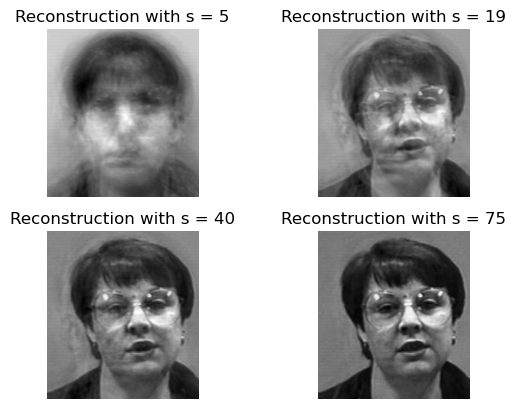

In [220]:
face2 = FacialRec()
shifted = face2.F_bar.T[0]

for i,s in enumerate([5,19,40,75]): # 4 values of s
    plt.subplot(2,2,i+1)
    plt.title('Reconstruction with s = {}'.format(s))
    # do the reconstruction in 7.3
    recon = face2.U[:,:s]@face2.project(shifted,s) + face2.mean_face
    show(recon)
    


### Problem 5 
Implement `FacialRec.find_nearest()`.

### Problem 6

- Implement `FacialRec.match()`.
- Generate some random faces with `sample_faces()`, and use `FacialRec.match()` to find the closest match (let $s=38$).
- For each test, display the sample image and its closest match.

C:\Users\wilso\AppData\Local\Temp\ipykernel_15940\1106870313.py:46: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  yield np.ravel(imread(fname, as_gray=True))


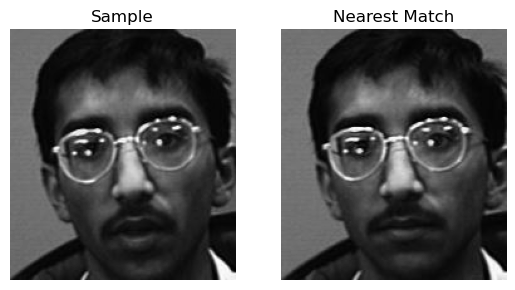

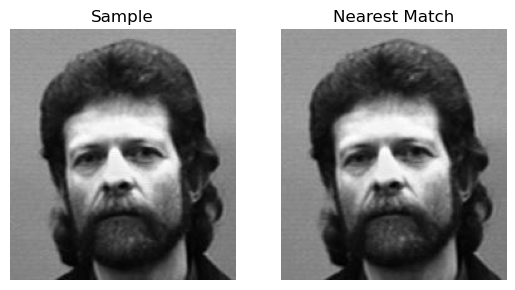

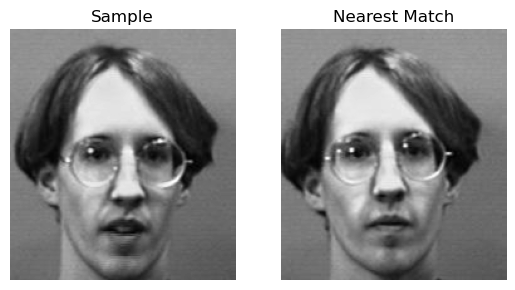

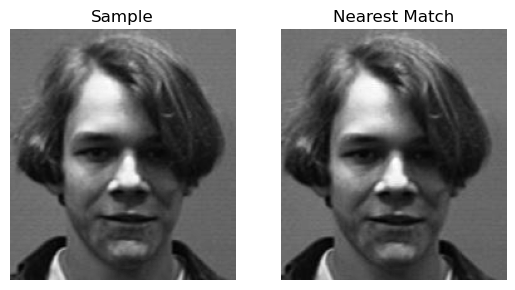

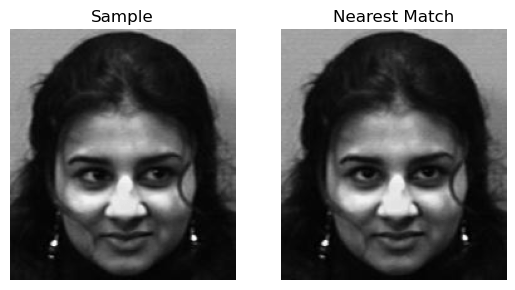

In [223]:
for s in sample_faces(5): # 5 values of s
    face.match(s) # match them
    plt.show()